# Spectral Clustering

It makes no assumptions.

Parameter selection:
* n_clusters: number of clusters to be found. The optimal number can be determined analyzing eigenvalues with "eigengap heuristic".
* affinity: How to construct the affinity matrix. Has 4 options:
‘nearest_neighbors’, ‘rbf’, ‘precomputed’, or ‘precomputed_nearest_neighbors’. Their performances can be graphically compared.
* random_state: integer. Using as an integer to make the randomness deterministic.
* assign_labels {‘kmeans’, ‘discretize’}: Using discretization for it to be less sensitive to random initialization.

* The remaining parameters are left by default.

Returns (attributes):
* affinity_matrix: array-like, shape (n_samples, n_samples) Affinity matrix used for clustering. 
* labels_array, shape (n_samples,): Labels of each point

In [1]:
from read_clustering.variant_call import VariantCall
path = 'C:/Users/lalaj/PycharmProjects/untitled3/read_clustering/tests/test_files/native_cbf5_gal.csv'
path = '/Users/andrewbailey/PycharmProjects/read_clustering/tests/test_files/native_cbf5_gal.csv'

native = VariantCall(path)

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
list_18 = native.get_contig_positions('RDN18-1')
list_25 = native.get_contig_positions('RDN25-1')

 # Determine n_clusters

*Eigengap heuristic*
* Assumes that the number of clusters k is usually given by the value of k that maximizes the eigengap: the difference between consecutive eigenvalues. 

* Eigenvalues measure the spectrum of an affinity matrix: how "far away" are groups of points similar enough to be in the same cluster.

* The larger this eigengap is, the better spectral clustering works.

Algorithm
* From a ndarray with the coordinates and a given number of neighbors, the affinity matrix is obtained.

* The affinity matrix is normalized and the eigenvalues calculated to find the maximum eigengap.

* The k clusters value and corresponding eigengaps are visualized to determine desirable k

Each point in the graph is a unit

The method for the algorithm is stated in the VariantClass above.


/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1592: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  RuntimeWarning)


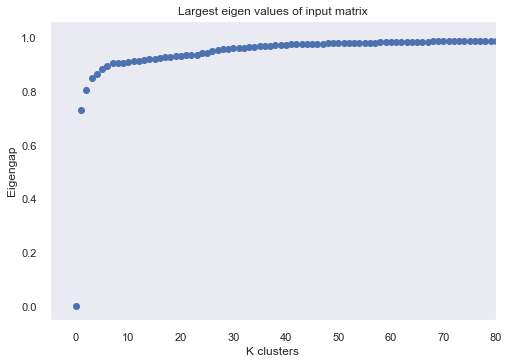

In [3]:
native.spectral_clusters(list_18)

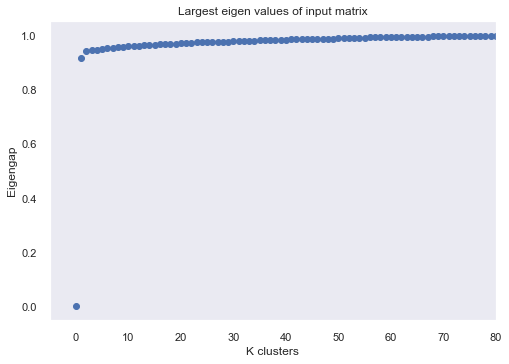

In [4]:
native.spectral_clusters(list_25)  

At k = 8 for 18S and at k = 3 for 25S, the graph reaches a high eigengap value, and after it the increase is not significant (similar to the "elbow" reasoning")

These are the optimal k clusters.

# Determine affinity

*Comparing Silhouette scores*
* The silhouette_score measures how similar each point is to its assigned cluster. The affinity method with highest score is desirable

* Here the affinity matrices built with "nearest_neighbors", "rbf", and the matrix obtained with self tuning are compared.

* Input the chosen k clusters as second argument

The method is stated in the VariantClass

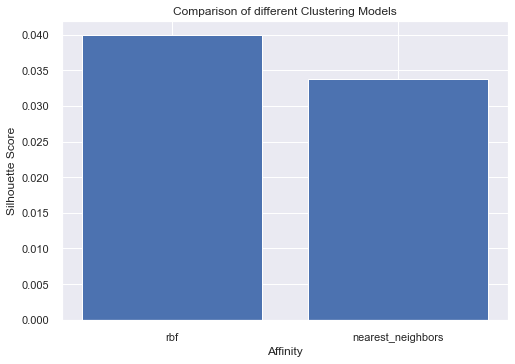

In [5]:
native.spectral_affinity(list_18, 8)

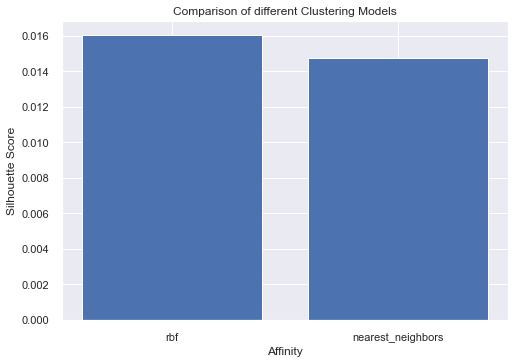

In [6]:
native.spectral_affinity(list_25, 8) 

'rbf' is chosen as it does better than 'nearest_neighbors'.

Plotting the data with the parameters chosen:

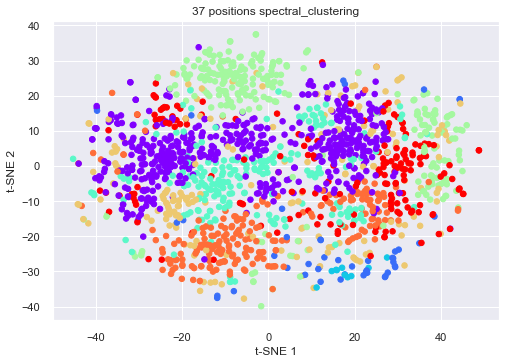

In [7]:
native.plot_tSNE_reads_covering_positions_data(list_18, 'spectral_clustering', n_clusters = 8, affinity = 'rbf') 

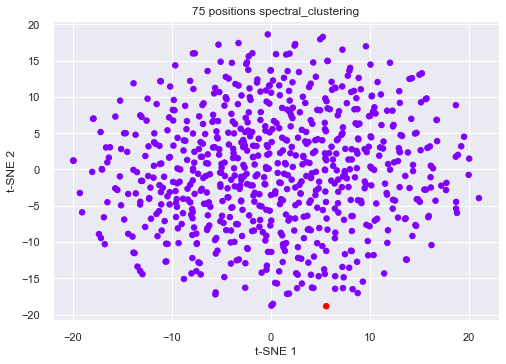

In [8]:
native.plot_tSNE_reads_covering_positions_data(list_25, 'spectral_clustering', n_clusters = 3, affinity = 'rbf') 
#it identifies all as one clusters with other 2 outliers (points of different color below)

https://towardsdatascience.com/spectral-graph-clustering-and-optimal-number-of-clusters-estimation-32704189afbe#:~:text=Spectral%20clustering%20is%20a%20technique,parameter%20for%20the%20similarity%20threshold.